In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#import data
df = pd.read_csv('Pendapatan.csv')

In [3]:
#lihat data yang sudah di import
df.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,27247,59,Pemerintah Negara,139616,Master,14,Menikah,Ekesekutif Managerial,Laki2,0.0,0.0,50.0,1
1,1640,52,Wiraswasta,158993,SMA,9,Cerai,Servis Lainnya,Perempuan,0.0,0.0,38.0,0
2,45206,52,Pekerja Bebas Bukan Perusahan,284648,SMA,9,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,99.0,1
3,16154,45,Wiraswasta,132847,SMA,9,Belum Pernah Menikah,Pembersih,Perempuan,0.0,0.0,40.0,0
4,43023,28,Wiraswasta,103432,SMA,9,Belum Pernah Menikah,Supir,Laki2,0.0,0.0,45.0,1


In [4]:
#buang kolom yang tidak terpakai
df.drop(['id', 'Pendidikan', 'Berat Akhir'], axis=1, inplace=True)

In [5]:
#mulai encoding kolom2 berisi feature
df = pd.get_dummies(df, columns=['Kelas Pekerja','Status Perkawinan', 'Pekerjaan', 'Jenis Kelamin'])

In [6]:
#cek apakah df sudah siap dipakai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38393 entries, 0 to 38392
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Umur                                         38393 non-null  int64  
 1   Jmlh Tahun Pendidikan                        38393 non-null  int64  
 2   Keuntungan Kapital                           38393 non-null  float64
 3   Kerugian Capital                             38393 non-null  float64
 4   Jam per Minggu                               38393 non-null  float64
 5   Gaji                                         38393 non-null  int64  
 6   Kelas Pekerja_?                              38393 non-null  uint8  
 7   Kelas Pekerja_Pekerja Bebas Bukan Perusahan  38393 non-null  uint8  
 8   Kelas Pekerja_Pekerja Bebas Perusahaan       38393 non-null  uint8  
 9   Kelas Pekerja_Pemerintah Lokal               38393 non-null  uint8  
 10

In [7]:
# bagi data label dan data feature
x = df.drop('Gaji', axis=1)
y = df['Gaji']

In [8]:
#bagi data menjadi train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

In [9]:
#Mulai memasukkan algoritma model kali ini saya menggunakan model KNN
model = KNeighborsClassifier()

In [10]:
#Mulai meng-training model
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
#Evaluasi model yang telah dilatih
cross_val_score(model, x_train, y_train, cv=5)

array([0.84649194, 0.84274784, 0.84128276, 0.85495686, 0.84386193])

In [12]:
#Melatih model menggunakan data test
yhat = model.predict(x_test)

In [13]:
#Membandingkan score antara prediksi data test, dan data asli (y_true)
print('accuracy score :', accuracy_score(y_test, yhat))
print(classification_report(y_test, yhat))

accuracy score : 0.8501106914962886
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      5761
           1       0.73      0.64      0.68      1918

    accuracy                           0.85      7679
   macro avg       0.81      0.78      0.79      7679
weighted avg       0.85      0.85      0.85      7679



### Model telah dilatih, mari uji menggunakan data real

In [14]:
df2 = pd.read_csv('Pendapatan_test.csv')

In [15]:
df2.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,47933,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,44213,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,20823,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,40565,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,9860,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [16]:
#buang kolom yang tidak terpakai
df2.drop(['id', 'Pendidikan', 'Berat Akhir'], axis=1, inplace=True)

In [17]:
#mulai encoding kolom2 berisi feature
df2 = pd.get_dummies(df2, columns=['Kelas Pekerja','Status Perkawinan', 'Pekerjaan', 'Jenis Kelamin'])

In [18]:
yhat_df2 = model.predict(df2)

### Data testing telah diuji, proses untuk upload ke kaggle

In [19]:
upload_kaggle = pd.read_csv('Pendapatan_test.csv')

In [20]:
upload_kaggle['Gaji'] = yhat_df2

In [21]:
upload_kaggle = upload_kaggle[['id','Gaji']]

In [23]:
upload_kaggle.to_csv('model_knn.csv', index=False, header=True)

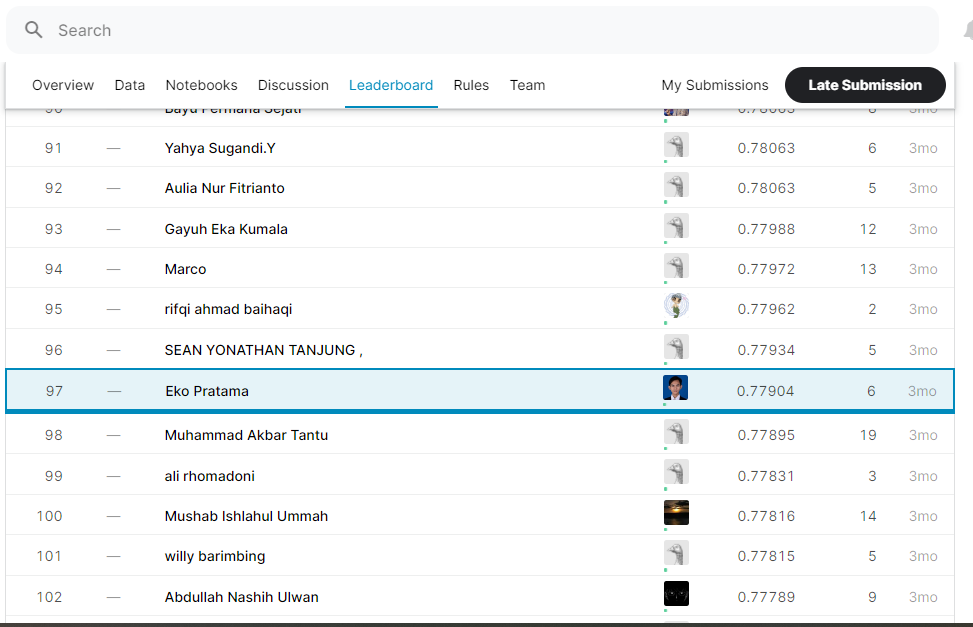

## Model yang saya latih mendapatkan score 0.78 atau 78% akurat dengan data real